# 1. Initial analysis.

# 1.1 Get expert data.

In [1]:
# Import libraries.
import MySQLdb as msql
import pandas as pd
import datetime
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Connect to mysql and get data.
useDB = False
expert = "expert_4376"

if useDB:
    # Get Data from DB.
    db = msql.connect(host = "localhost", user = "root", passwd = "", db = "forex_data")
    data = pd.read_sql_query("SELECT * FROM " + expert, db)[1:]
    data.head()
else:
    # Get Data from CSV.
    data = pd.read_csv("dataset/" + expert + "_data.csv")

# Convert date_time column to datetime type.
data['date_time'] = pd.to_datetime(data['date_time'])

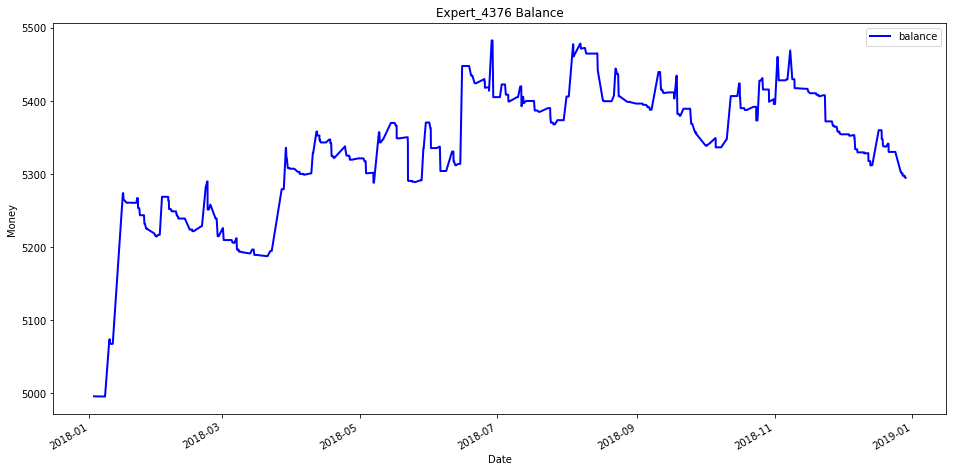

In [3]:
# Plot Balance.
columns = ["date_time", "balance"]
balance = data[columns]
balance.set_index("date_time", inplace = True)
balance.iloc[1:].plot(figsize=(16, 8), c = "b", lw=2)
plt.title(expert.capitalize() + " Balance")
plt.xlabel("Date")
plt.ylabel("Money")
plt.savefig("./figures/balance.png")
plt.show()

# 1.2 Expert performance.

In [4]:
# Evaluate performance.
initial_balance = data.iloc[0].balance
final_balance = data.iloc[-1].balance
total_net_profit = round(final_balance - initial_balance, 2)

# Profiability in percentage.
profitability = round((final_balance / initial_balance) - 1, 2)

# Print results.
print("Initial Balance: ", initial_balance)
print("Final Balance: ", final_balance)
print("Total net profit: ", total_net_profit)
print("Profiability: ", profitability)

Initial Balance:  5000.0
Final Balance:  5294.87
Total net profit:  294.87
Profiability:  0.06


In [5]:
# Gross profit and loss.
gross_profit = round(data.loc[(data["direction"] == "out") & (data["profit"] >= 0)].profit.sum(), 3)
gross_loss = round(abs(data.loc[(data["direction"] == "out") & (data["profit"] < 0)].profit.sum()), 3)
print("Gross Profit: ", gross_profit)
print("Gross Loss: ", gross_loss)

Gross Profit:  1746.7
Gross Loss:  1442.6


In [6]:
# Commission and swaps.
total_commission = data.commission.sum()
total_swap = data.swap.sum()
print("Total Commission: ", total_commission)
print("Total Swap: ", total_swap)

Total Commission:  0.0
Total Swap:  -9.23


In [7]:
# Profit factor
profit_factor = round(gross_profit / gross_loss, 2)

# Trades info.
max_profit_trade = data.profit.max()
min_profit_trade = data[(data.profit > 0)].profit.min()
max_loss_trade = data[(data.profit < 0)].profit.min()
min_loss_trade = data[(data.profit < 0)].profit.max()

print("Profit Factor: ", profit_factor) 
print("Max Profit Trade: ", max_profit_trade)
print("Min Profit Trade: ", min_profit_trade)
print("Max Loss Trade: ", max_loss_trade)
print("Min Loss Trade: ", min_loss_trade)

Profit Factor:  1.21
Max Profit Trade:  206.48
Min Profit Trade:  0.14
Max Loss Trade:  -77.49
Min Loss Trade:  -0.09


In [8]:
# Numbers of trades and deals.
total_deals = data.order_num.count()
total_trades = total_deals / 2

print("Total Deals: ", total_deals)
print("Total Trades: ", total_trades)

Total Deals:  506
Total Trades:  253.0


In [9]:
# Expected payoff and average profit and loss.
expected_payoff = round(total_net_profit / total_trades, 4)
average_profit = round(data[data.profit > 0]["profit"].mean(), 3)
average_loss = round(data[data.profit < 0]["profit"].mean(), 3)

print("Expected PayOff: ", expected_payoff)
print("Average Profit: ", average_profit)
print("Average Loss: ", average_loss)

Expected PayOff:  1.1655
Average Profit:  22.983
Average Loss:  -8.15


In [10]:
# Number of short and long trades.
trades_type = data[data.direction == "in"]["order_type"]
short_trades = trades_type[trades_type == "sell"].count()
buy_trades = trades_type[trades_type == "buy"].count()

print("No. Short Trades: ", short_trades)
print("No. Buy Trades: ", buy_trades)

No. Short Trades:  137
No. Buy Trades:  116


In [11]:
# Profit & Loss volatility.
profit_vol = round(data[data.profit > 0]["profit"].std(), 4)
loss_vol = round(data[data.profit < 0]["profit"].std(), 4)
print("Profit Volatility: ", profit_vol)
print("Loss Volatility: ", lossvol)

Profit Volatility:  34.0059


NameError: name 'lossvol' is not defined

In [12]:
# Number of short and long profitable trades.

# Absolute.
short_profit_trades_abs = data[(data.profit > 0) & (data.order_type == "sell") & (data.direction == "out")]["profit"].count()
buy_profit_trades_abs = data[(data.profit > 0) & (data.order_type == "buy") & (data.direction == "out")]["profit"].count()

# Relative.
short_profit_trades_rel = round(short_profit_trades_abs / short_trades, 3)
buy_profit_trades_rel = round(buy_profit_trades_abs / buy_trades, 3)

# Total trades (profit and loss; abs and %)
total_profit_trades_abs = round(short_profit_trades_abs + buy_profit_trades_abs, 3)
total_profit_trades_rel = round(total_profit_trades_abs / total_trades, 3)
total_loss_trades_abs = round(total_trades - total_profit_trades_rel, 3)
total_loss_trades_rel = round(1 - total_profit_trades_rel, 3)

# Winn / loss ratio.
ratio_wl = round(total_profit_trades_abs / total_loss_trades_abs, 5)       


# Print results.

print("------ Buy / Short Trades -----")
print("")
print("")

print("Total Short Trades: ", short_trades)
print("No. Short Profit Trades: ", short_profit_trades_abs)
print("No. Short Loss Trades: ", short_trades - short_profit_trades_abs)
print("% Short Profit Trades: ", round(short_profit_trades_rel, 5))
print("")

print("Total Buy Trades: ", buy_trades)
print("No. Buy Profit Trades: ", buy_profit_trades_abs)
print("No. Buy Loss Trades: ", buy_trades - buy_profit_trades_abs)
print("% Buy Profit Trades: ", round(buy_profit_trades_rel, 5))
print("")
print("")

print("------ Trades in General -----")
print("")
print("")

print("No. Total Profit Trades: ", total_profit_trades_abs)
print("% Total Profit Trades: ", round(total_profit_trades_rel, 5))
print("")

print("No. Total Loss Trades: ", total_loss_trades_abs)
print("% Total Loss Trades: ", round(total_loss_trades_rel, 5))
print("")

print("Win - Loss Ratio: ", ratio_wl)

print("")
print("-------------------------------")

------ Buy / Short Trades -----


Total Short Trades:  137
No. Short Profit Trades:  35
No. Short Loss Trades:  102
% Short Profit Trades:  0.255

Total Buy Trades:  116
No. Buy Profit Trades:  41
No. Buy Loss Trades:  75
% Buy Profit Trades:  0.353


------ Trades in General -----


No. Total Profit Trades:  76
% Total Profit Trades:  0.3

No. Total Loss Trades:  252.7
% Total Loss Trades:  0.7

Win - Loss Ratio:  0.30075

-------------------------------


In [13]:
# Put/Call Ratio
put_volume = data[(data.direction == "in") & (data.order_type == "sell")]["volume"].sum()
call_volume = data[(data.direction == "in") & (data.order_type == "buy")]["volume"].sum()
put_call_ratio = round(put_volume / call_volume, 3)

print("Put/Call Ratio: ", put_call_ratio)

Put/Call Ratio:  1.255


In [14]:
# Holding time variables.
df = data.copy()

diff = abs(df["date_time"].shift(1) - df["date_time"])
df["diff_time"] = diff

holding_max_time = df[df.direction == "out"]["diff_time"].max()
holding_min_time = df[df.direction == "out"]["diff_time"].min()
holding_average_time = df[df.direction == "out"]["diff_time"].mean()

waiting_max_time = df[df.direction == "in"]["diff_time"].max()
waiting_min_time = df[df.direction == "in"]["diff_time"].min()
waiting_average_time = df[df.direction == "in"]["diff_time"].min()

print("Holding Max Time: ", holding_max_time)
print("Holding Min Time: ", holding_min_time)
print("Holding Average Time: ", holding_average_time)

Holding Max Time:  4 days 22:00:00
Holding Min Time:  0 days 01:00:00
Holding Average Time:  0 days 18:21:20.391304


In [15]:
# Balance variation.
df = data.copy()

# Relative (%)
dr_relative = df["balance"] / df["balance"].shift(1) - 1
dr_relative = round(dr_relative, 6)
df["balance_variation_percentage"] = dr_relative

# Maximal.
dr_maximal = df["balance"] - df["balance"].shift(1)
df["balance_variation_absolute"] = dr_maximal

# Drowndows.
balance_drawdown_absolute = df["balance"][1] - df["balance"].min()

print("Balance Drawdown Absolute: ", balance_drawdown_absolute)
# Reference: https://www.metatrader5.com/en/terminal/help/trading_advanced/history_report

Balance Drawdown Absolute:  0.24000000000069122


In [16]:
# Sharpe ratio.
"""
profit_per = df[df.direction == "out"]["balance_variation_percentage"].mean()
devest = df[df.direction == "out"]["balance_variation_percentage"].std()
sharpe_ratio = round(profit_per / devest, 5)
print("Sharpe Ratio: ", sharpe_ratio)
"""
print("")

# 1.3 Trading times analysis.

In [17]:
# Groupby datetime (year, month, day of the week.)
import calendar
months_names = "January February March April May June July August September October November December".split()

df2 = data["date_time"].copy().to_frame()
df2["month"] = pd.to_datetime(df[df.direction == "in"]["date_time"]).dt.strftime("%m")
df2["week_day"] = data[data.direction == "in"]["date_time"].map(lambda date: list(calendar.day_name)[date.weekday()])
df2["year"] = pd.to_datetime(df["date_time"]).dt.strftime("%y")

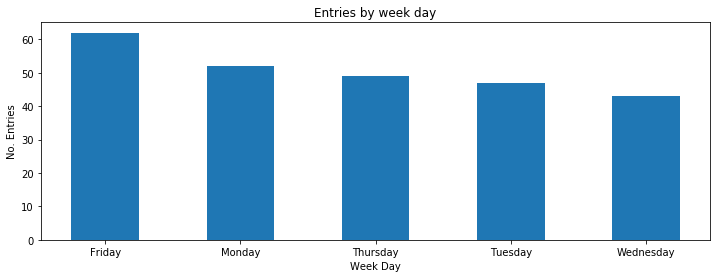

In [18]:
# Entries by week day.
values = df2.week_day.value_counts()
fig = plt.figure()
plt.figure(figsize=(12,4))
plt.title("Entries by week day")
plt.bar(values.sort_index().index, height = values, width=0.5)
plt.xlabel("Week Day")
plt.ylabel("No. Entries")
plt.savefig("./figures/entries_week_days.png")
plt.show()

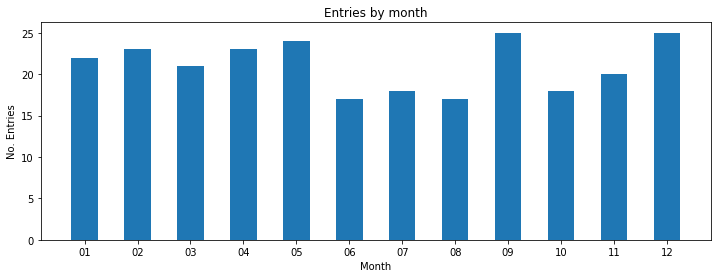

In [19]:
# Entries by month.
values = df2.month.value_counts().sort_index()
fig = plt.figure()
plt.figure(figsize=(12,4))
plt.title("Entries by month")
plt.bar(values.index, height = values, width=0.5)
plt.xlabel("Month")
plt.ylabel("No. Entries")
plt.savefig("./figures/entries_month.png")
plt.show()

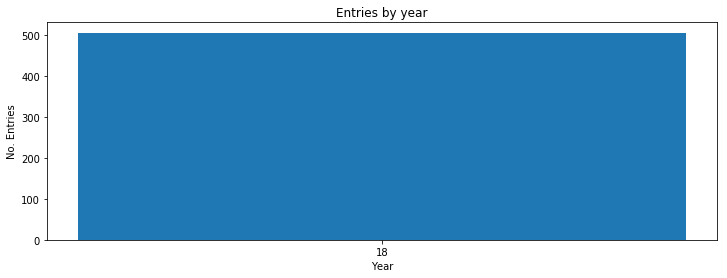

In [20]:
# Entries by years.
values = df2.year.value_counts().sort_index()
fig = plt.figure()
plt.figure(figsize=(12,4))
plt.title("Entries by year")
plt.bar(values.index, height = values, width=0.5)
plt.xlabel("Year")
plt.ylabel("No. Entries")
plt.savefig("./figures/entries_year.png")
plt.show()

# 1.4 Montecarlo Simulation.

In [21]:
# Monte Carlo Simulation.
def montecarlo_simulation(last_balance, p_vol, l_vol, n_simulations = 100, n_days = 252):
    
    # Set monte carlo variables.
    last_balance = last_balance #.iloc[-1]
    num_simulations = n_simulations
    num_days = n_days
    
    # Create dataframe simulation.
    simulation_df = pd.DataFrame()
    

    for x in range(num_simulations):
        count = 0        
        price_series = []
    
        random_num = np.random.uniform(1, 10) / 10
        if random_num > ratio_wl:
            price = last_balance + abs((1 + np.random.normal(0, l_vol))) * -1
        else:
            price = last_balance + abs((1 + np.random.normal(0, p_vol)))
        price_series.append(price)
        
        for y in range(num_days - 1):
            if count == n_days:
                break
                
            random_num = np.random.uniform(1, 10) / 10
            if random_num >= ratio_wl:
                price = price_series[count] + abs((1 + np.random.normal(0, l_vol))) * -1
            else:
                price = price_series[count] + abs((1 + np.random.normal(0, p_vol)))
            
            #price = price_series[count] + (1 + np.random.normal(0, profit_vol))
            
            price_series.append(price)
            count += 1
            
        simulation_df[x] = price_series
    return simulation_df

C:\Users\Juan Esteban\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


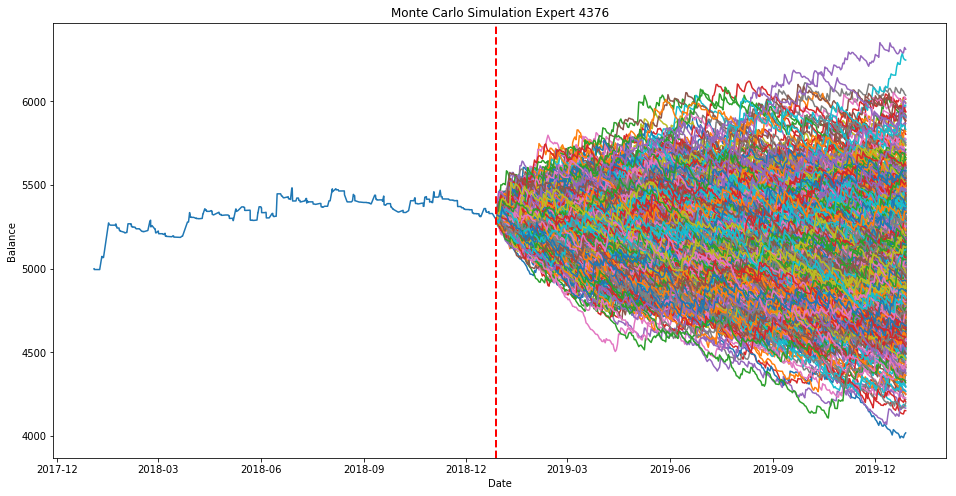

Number of positive outcomes:  216 27.55 %
Number of negative outcomes:  784 72.45 %
Number of Days simulated:  365
Initial Balance:  5300.82
Mean Balance:  5042.67
Net Mean Profit:  -258.15
Montecarlo Profiability:  -4.87 %


C:\Users\Juan Esteban\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater


In [22]:
# Simulations days.
days = 365

# Process montecarlo data.
monte_data = data[["date_time", "balance", "direction"]]
monte_data.date_time = pd.to_datetime(monte_data.date_time)
monte_data.columns = ["Date", "balance", "direction"]
monte_data.set_index("Date", inplace = True)
monte_data = monte_data[monte_data.direction == "in"].copy()
monte_data.drop("direction", axis=1, inplace = True)
monte_data = monte_data.resample("B").pad().fillna(5000)
monte_data.head()

# Get results dataframe simulation.
last_balance = monte_data.iloc[-1].values[0]
last_day = monte_data.index[monte_data["balance"] == last_balance][-1]

# Get results of simulation.
results = montecarlo_simulation(last_balance, profit_vol, loss_vol, n_simulations = 1000, n_days = days)

# Generate 253 days.
date_list = [last_day + datetime.timedelta(days=x) for x in range(0, days + 1)][1:]

# Set indexes names.
results.index = date_list

# Concat balance with montecarlo results.
results = pd.concat([balance, results])

# Plot results.
fig = plt.figure()
plt.figure(figsize=(16,8))
plt.title("Monte Carlo Simulation " + expert.replace("_"," ").capitalize())
plt.plot(results)
#plt.axhline(y = last_balance, color = "b", linestyle = "-", lw=3)
plt.axvline(x=last_day, color = "r", linestyle = "--", lw=2)
plt.xlabel("Date")
plt.ylabel("Balance")
plt.savefig("./figures/montecarlo.png")
plt.show()

good = 0
for i in (results.iloc[-1].values > last_balance):
    if i == True:
        good += 1
       
    
# Define variables.
positive_outcomes_abs = good 
negative_outcomes_abs = 1000 - positive_outcomes_abs
positive_outcomes_rel = round((good / (1000 - good)) * 100, 2)
negative_outcomes_rel = round( (1 - (good / (1000 - good))) * 100, 2)
montecarlo_days_simulated = results[0].count()
montecarlo_mean_balance = round(results.iloc[-1].mean(), 2)
montecarlo_mean_netprofit = round(results.iloc[-1].mean() - last_balance, 2)
montecarlo_profiability = round(montecarlo_mean_netprofit / last_balance * 100, 2)
        
print("Number of positive outcomes: ", positive_outcomes_abs, positive_outcomes_rel, "%")
print("Number of negative outcomes: ", negative_outcomes_abs, negative_outcomes_rel, "%")
print("Number of Days simulated: ", montecarlo_days_simulated)
print("Initial Balance: ", last_balance)
print("Mean Balance: ", montecarlo_mean_balance)
print("Net Mean Profit: ", montecarlo_mean_netprofit)
print("Montecarlo Profiability: ", montecarlo_profiability, "%")

# 2. Pyfolio Analysis.

# 2.1 Get expert data.

# Getting expert returns.

In [23]:
# Import libraries.
import warnings
warnings.filterwarnings("ignore")

import pyfolio as pf

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [24]:
# Adding days functions.
def addDay(data, money, date, column_name, insert = True):
    ini_date = pd.DataFrame(data = [[money, date]], columns = [column_name, "Date"])
    ini_date.Date = pd.to_datetime(ini_date.Date)
    ini_date.set_index("Date", inplace = True)

    if insert: 
        return  pd.concat([ini_date, data]).copy()
    else:
        return  pd.concat([data, ini_date]).copy()

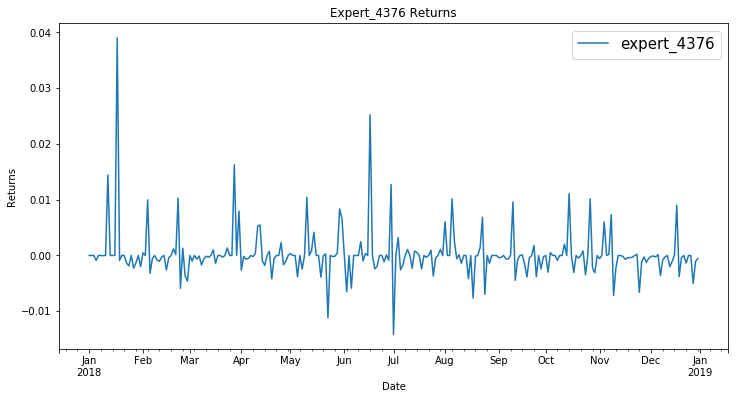

                           expert_4376
2018-01-01 00:00:00+00:00     0.000000
2018-01-02 00:00:00+00:00     0.000000
2018-01-03 00:00:00+00:00     0.000000
2018-01-04 00:00:00+00:00    -0.000864
2018-01-05 00:00:00+00:00     0.000000
Business Days:  261


In [25]:
# Getting Data.
exp_data = pd.read_csv("dataset/" + expert + "_data.csv")
exp_data = exp_data[exp_data.direction == "out"][["date_time", "balance"]]
exp_data.date_time = pd.to_datetime(exp_data.date_time)
exp_data.columns = ["index", expert]
exp_data.set_index("index", inplace = True)

# Adding first and last day of the year.
exp_data = addDay(exp_data, 5000, "2018-01-01 00:00:00", expert, True)
exp_data = addDay(exp_data, exp_data.iloc[-1].values[0], "2018-12-31 00:00:00", expert, False)

# Get returns
exp_data = exp_data.resample("B").pad().pct_change(fill_method = "pad").fillna(0) 

# Set datetime like object.
exp_data = exp_data.tz_localize("UTC")

# Plot Data.
exp_data.plot(figsize=(12,6))
plt.title(expert.capitalize() + " Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend(prop = {"size": 15})
plt.savefig("./figures/returns.png")
plt.show()

# Show returns.
print(exp_data.head())

# Print business days.
print("Business Days: ", exp_data[expert].count())

# Getting expert transactions.

                           amount    price       symbol
index                                                  
2018-01-03 04:00:00+00:00   -0.08  1.20529  expert_4376
2018-01-03 09:00:00+00:00   -0.08  1.20448  expert_4376
2018-01-08 05:00:00+00:00   -0.08  1.20358  expert_4376
2018-01-10 08:00:00+00:00   -0.09  1.19280  expert_4376
2018-01-11 15:00:00+00:00    0.08  1.20042  expert_4376


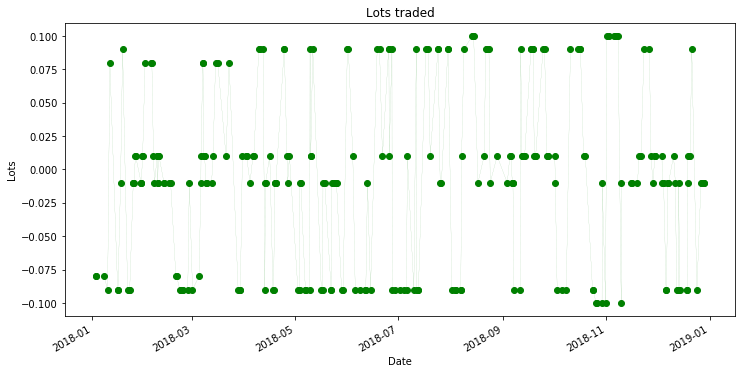

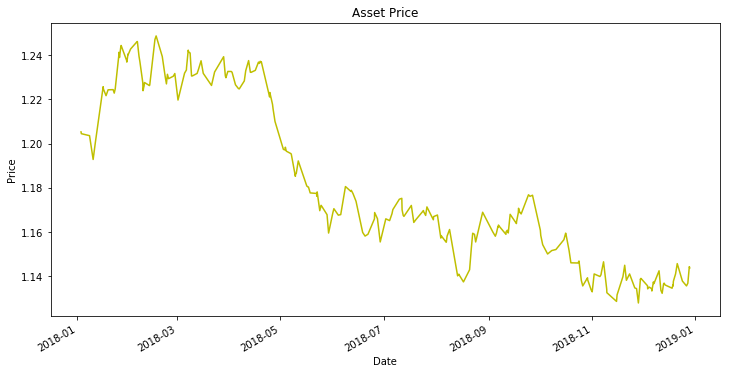

In [26]:
"""
- Example:
            index                  amount   price    symbol
            2004-01-09 12:18:01    483      324.12   'AAPL'
            2004-01-09 12:18:01    122      83.10    'MSFT'
            2004-01-13 14:12:23    -75      340.43   'AAPL'
"""

# Load transactions data.
trans = pd.read_csv("dataset/" + expert + "_data.csv")
trans = trans[trans.direction == "in"][["date_time", "volume", "price", "order_type"]]

# Get volume sign.
trans["sign"] = np.where(trans.order_type == "sell", -1, 1)
trans.volume = trans.volume * trans.sign

# Drop columns
trans.drop("sign", axis = 1, inplace = True)
trans.drop("order_type", axis = 1, inplace = True)

# Set index
trans.date_time = pd.to_datetime(trans.date_time)   
trans.columns = ["index", "amount", "price"]
trans.set_index("index", inplace = True)

# Set datetime like object.
trans = trans.tz_localize("UTC")

# Add symbol column.
trans["symbol"] = str(expert)

# Show df.
print(trans.head())

# Plot lots traded.
trans["amount"].plot(figsize=(12,6), c="g", marker = "o", linestyle="dashed", linewidth=0.1)
plt.title("Lots traded")
plt.xlabel("Date")
plt.ylabel("Lots")
plt.savefig("./figures/lots_traded.png")
plt.show()

# Plot asset price.
trans["price"].plot(figsize=(12,6), c = "y")
plt.title("Asset Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.savefig("./figures/asset_price.png")
plt.show()

# Getting expert positions.

                           expert_4376       cash
index                                            
2018-01-03 04:00:00+00:00     -96.4232  4903.5768
2018-01-03 08:00:00+00:00       0.0000  4995.6800
2018-01-03 09:00:00+00:00     -96.3584  4899.3216
2018-01-08 04:00:00+00:00       0.0000  4995.4400
2018-01-08 05:00:00+00:00     -96.2864  4899.1536



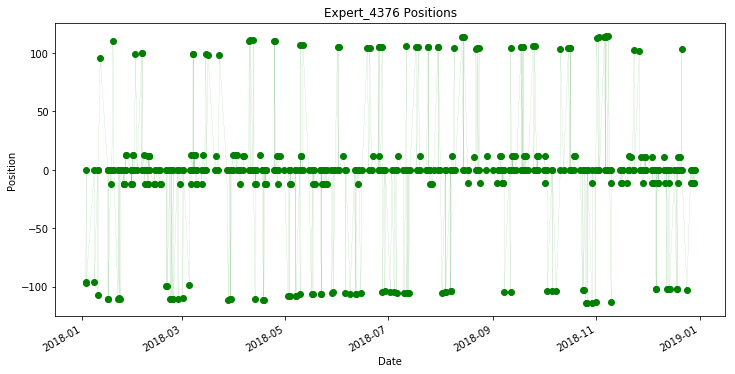

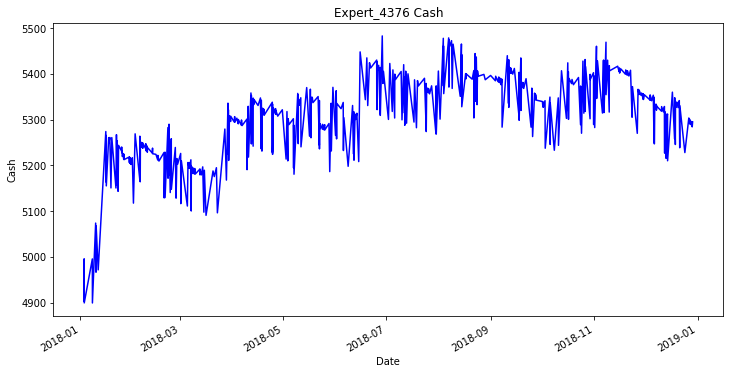

In [27]:
"""
- Example:
            index         'AAPL'         'MSFT'          cash
            2004-01-09    13939.3800     -14012.9930     711.5585
            2004-01-12    14492.6300     -14624.8700     27.1821
            2004-01-13    -13853.2800    13653.6400      -43.6375
"""

# Load positions data.
positions = pd.read_csv("dataset/" + expert + "_data.csv")
positions = positions[["date_time", "volume", "price", "order_type", "direction", "balance"]]

# Get volume sign.
positions["sign"] = np.where(positions.order_type == "sell", -1, 1)
positions["abs_pos"] = positions.volume * positions.price * 1000
positions.volume = positions.volume * positions.sign

# Get position value.
positions["position"] = positions.volume * positions.price * 1000
positions["position"][positions.direction == "out"] = 0
positions["abs_pos"][positions.direction == "out"] = 0

# Drop columns.
positions.drop("direction", axis = 1, inplace = True)
positions.drop("order_type", axis = 1, inplace = True)
positions.drop("sign", axis = 1, inplace = True)
positions.drop("price", axis = 1, inplace = True)
positions.drop("volume", axis = 1, inplace = True)

# Set Date as index.
positions.date_time = pd.to_datetime(positions.date_time)   
positions.columns = ["index", "balance", "abs_pos", expert]
positions.set_index("index", inplace = True)

# Set cash column.
positions["cash"] = positions.balance - positions.abs_pos

# Drop last columns.
positions.drop("balance", axis=1, inplace=True)
positions.drop("abs_pos", axis=1, inplace=True)

# Set datetime like object.
positions = positions.tz_localize("UTC")

# Print positions.
print(positions.head())
print("")

# Plot positions.
positions[expert].plot(figsize=(12,6), c="g", marker = "o", linestyle="dashed", linewidth=0.1)
plt.title(expert.capitalize() + " Positions")
plt.xlabel("Date")
plt.ylabel("Position")
plt.savefig("./figures/positions.png")
plt.show()

# Plot cash.
positions["cash"].plot(figsize=(12,6), c="b")
plt.title(expert.capitalize() + " Cash")
plt.xlabel("Date")
plt.ylabel("Cash")
plt.savefig("./figures/cash.png")
plt.show()

# Getting S&P500 Benchmark. 

In [28]:
# Import libraries.
from pandas_datareader import data as web

Business Days:  261


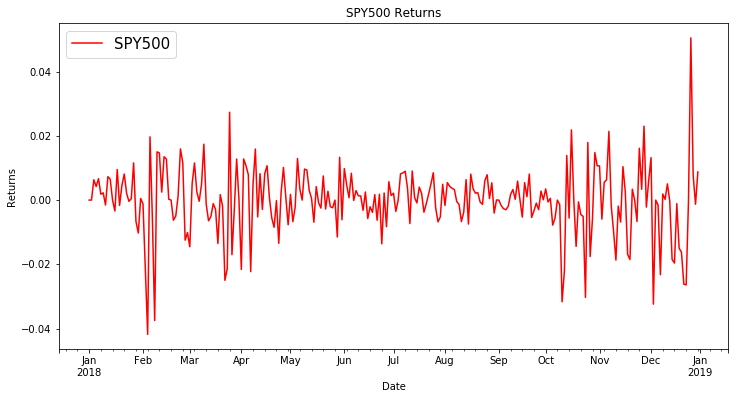

In [29]:
# Getting S&P500 Data.
start = datetime.datetime(2018, 1, 1, 0, 0, 0)
end = datetime.datetime(2018, 12, 31, 0, 0, 0)
spy500 = web.get_data_yahoo('SPY',start=start,end=end)
spy500 = spy500["Close"].to_frame().copy()
spy500.columns = ["SPY500"]
spy500 = addDay(spy500, spy500.iloc[0].values[0], "2018-01-01 00:00:00", "SPY500", True)
spy500 = spy500.resample("B").pad().pct_change(fill_method = "pad").fillna(0) 
print("Business Days: ", spy500["SPY500"].count())

# Set datetime like object.
spy500 = spy500.tz_localize("UTC")

# Plot benchmark returns.
spy500.plot(figsize=(12,6), c = "red")
plt.title("SPY500 Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend(prop = {"size": 15})

In [30]:
# Setting variables.
returns = exp_data[expert].copy()
benchmark_rets = spy500["SPY500"].copy()
live_start_date = "2018-11-01"
cone_std = 2
transactions = trans.copy()

# 2.2 Strategy Stats.

In [31]:
# Show performance stats.
pf.show_perf_stats(returns, benchmark_rets, positions = positions, transactions = transactions)

Start date,2018-01-01
End date,2018-12-31
Total months,12
,Backtest
Annual return,5.7%
Cumulative returns,5.9%
Annual volatility,7.0%
Sharpe ratio,0.82
Calmar ratio,1.66
Stability,0.48
Max drawdown,-3.4%


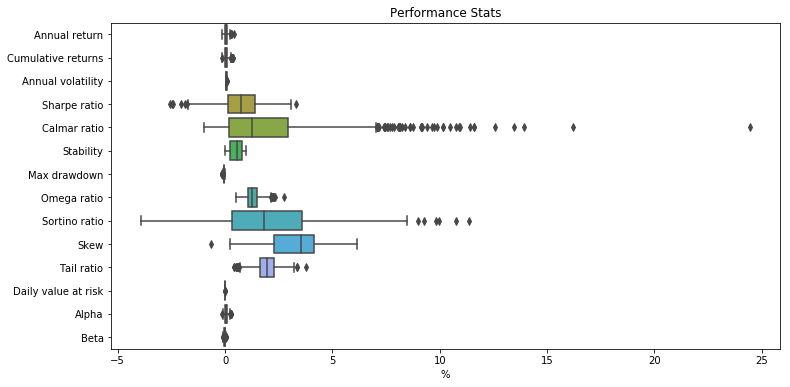

In [32]:
# Plot performance stats.
pf.plot_perf_stats(returns, benchmark_rets)
plt.title("Performance Stats")
plt.xlabel("%")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/perfomance_stats_quantiles.png")
plt.show()

# 2.3 Returns analysis.

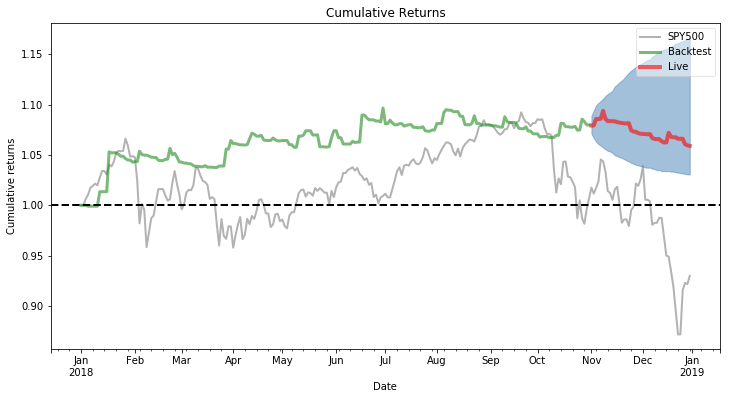

In [33]:
# Plot cumulative returns.
pf.plot_rolling_returns(
    returns, 
    factor_returns = benchmark_rets, 
    live_start_date = live_start_date, 
    cone_std = cone_std)
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/cumulative_returns.png")
plt.show()

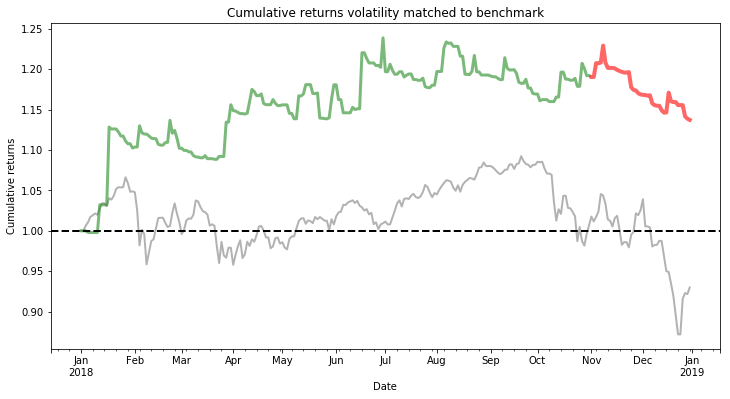

In [34]:
# Plot Cumulative returns volatility matched to benchmark.
pf.plot_rolling_returns(
    returns, 
    factor_returns = benchmark_rets, 
    cone_std = None, 
    live_start_date = live_start_date,
    volatility_match = (benchmark_rets is not None), 
    legend_loc = None
)
plt.title("Cumulative returns volatility matched to benchmark")
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/cumulative_returns_benchmark.png")
plt.show()

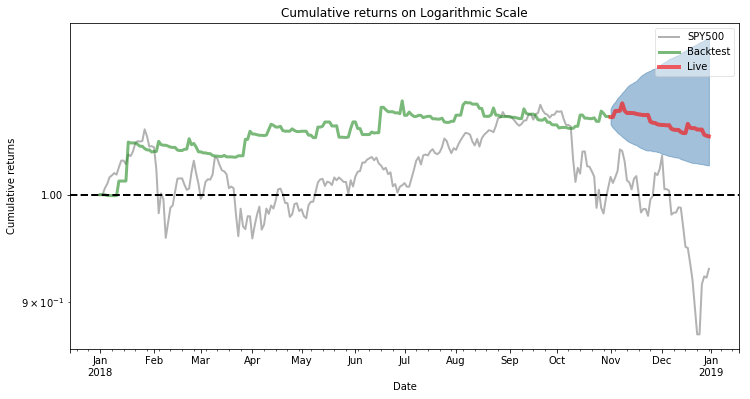

In [35]:
# Plot Cumulative returns on Logarithmic Scale.
pf.plot_rolling_returns(
        returns,
        factor_returns = benchmark_rets,
        logy=True,
        live_start_date = live_start_date,
        cone_std = cone_std
)
plt.title("Cumulative returns on Logarithmic Scale")
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/cumulative_returns_log_scale.png")
plt.show()

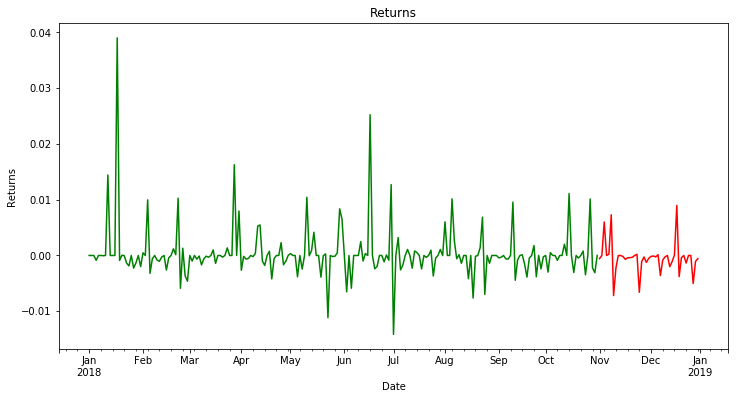

In [36]:
# Plot returns.
pf.plot_returns(returns, live_start_date = live_start_date)
plt.title("Returns")
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/returns_live.png")
plt.show()

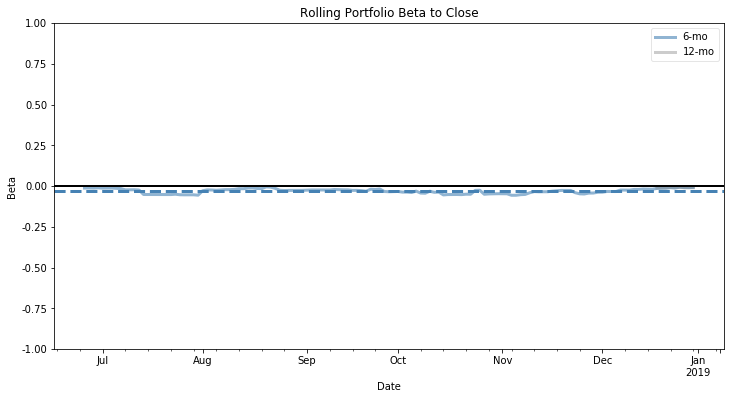

In [37]:
# Plot rolling beta.
pf.plot_rolling_beta(
        returns, 
        benchmark_rets
    )
plt.title("Rolling Portfolio Beta to Close")
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/porfolio_beta_to_close.png")
plt.show()

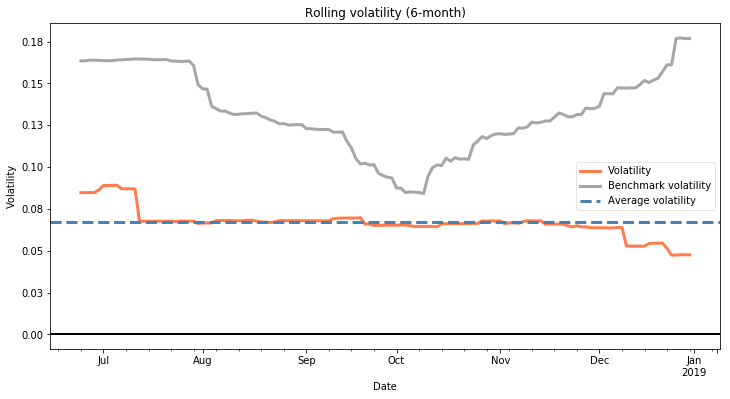

In [38]:
# Plot Rolling volatility (6-month).
pf.plot_rolling_volatility(
        returns, 
        factor_returns=benchmark_rets
)
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/rolling_volatility.png")
plt.show()

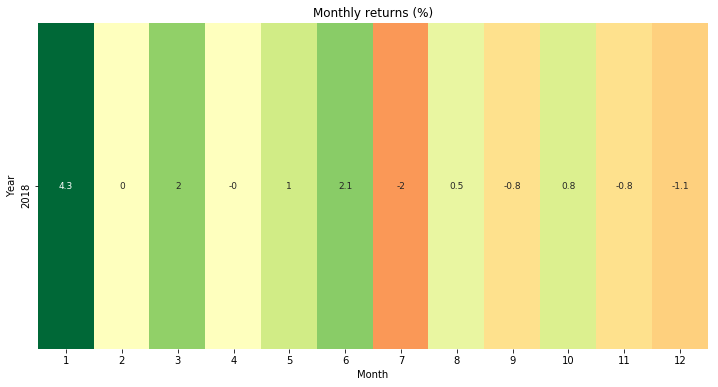

In [39]:
# Plot monthly returns.
pf.plot_monthly_returns_heatmap(returns)
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/monthly_returns.png")
plt.show()

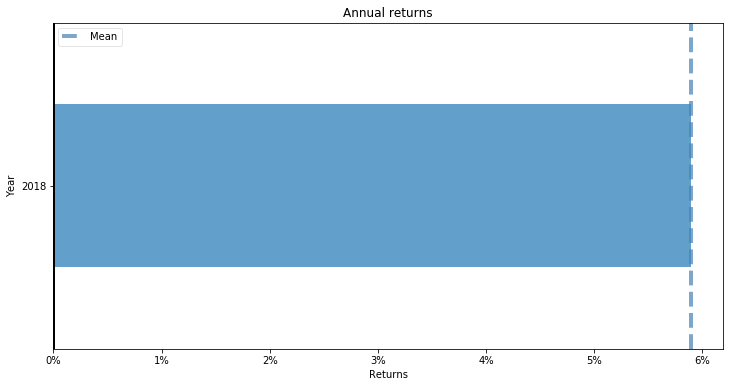

In [40]:
# Plot annual returns.
pf.plot_annual_returns(returns)
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/annual_returns.png")
plt.show()

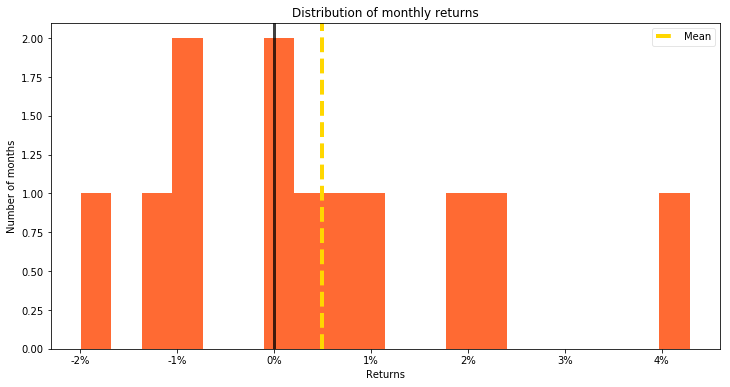

In [41]:
# Plot distribution of monthly returns.
pf.plot_monthly_returns_dist(returns)
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/distribution_monthly_returns.png")

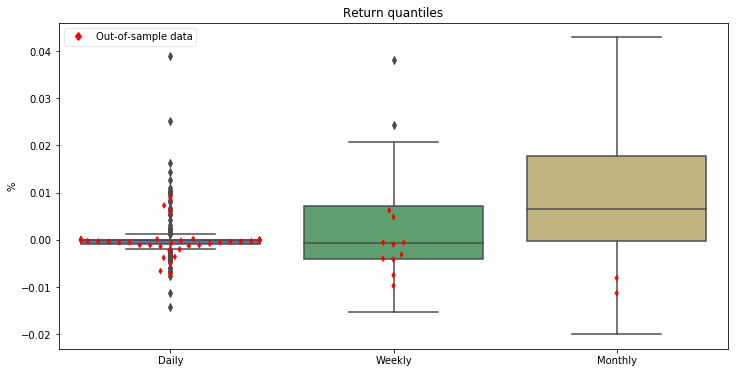

In [42]:
# Plot return quantiles.
pf.plot_return_quantiles(returns, live_start_date = live_start_date)
plt.ylabel("%")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/return_quantiles.png")
plt.show()

# 2.4 Drawdown periods analysis.

In [43]:
# Show worst drawdown periods.
pf.show_worst_drawdown_periods(returns)

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.43,2018-06-29,2018-12-31,NaT,NaN
1,1.79,2018-02-22,2018-03-21,2018-03-30,27
2,1.51,2018-05-17,2018-05-28,2018-05-31,11
3,1.31,2018-04-12,2018-05-08,2018-05-15,24
4,1.24,2018-06-01,2018-06-06,2018-06-18,12


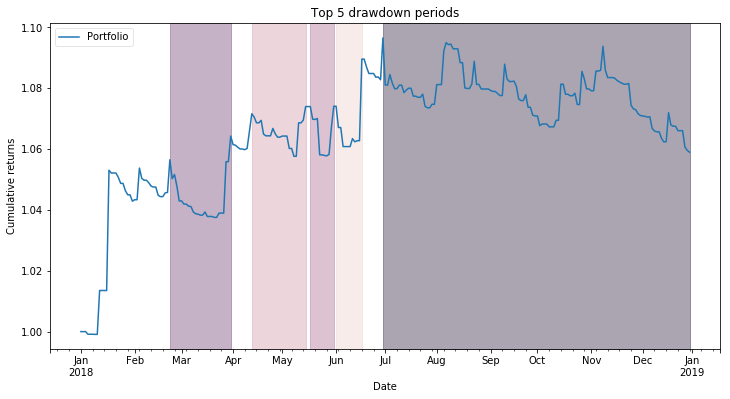

In [44]:
# Plot drawdown periods.
pf.plot_drawdown_periods(returns, top = 5)
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/top_5_drawdowns.png")
plt.show()

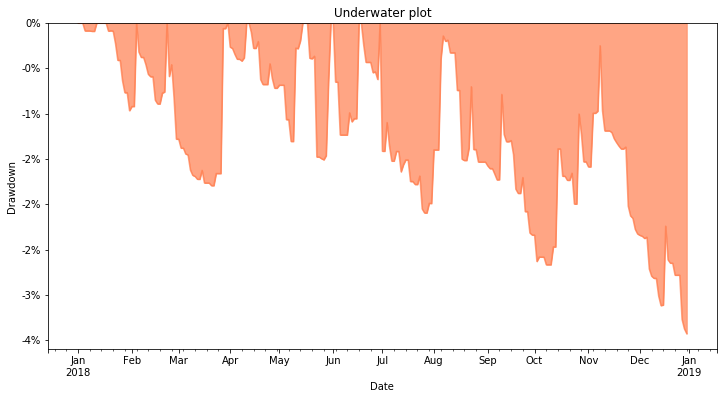

In [45]:
# Plot Drawdown Underwater.
pf.plot_drawdown_underwater(returns)
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/underwater_plot.png")
plt.show()

In [46]:
# Calculate recovery factor.
recovery_factor = round((0.0343 * 5000) / balance.iloc[-1].values[0], 4)
print("Recovery factor: ", round(recovery_factor * 100, 2))

Recovery factor:  3.24


# 2.5 Interesting Times.

Stress Events,mean,min,max
New Normal,0.02%,-1.41%,3.90%


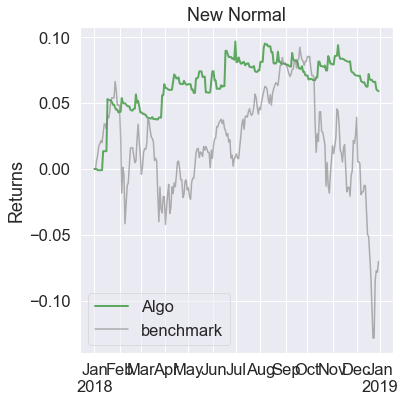

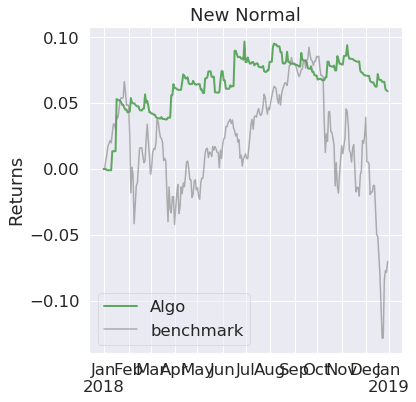

In [47]:
# Generate interesting times.

"""
    Generate a number of returns plots around interesting points in time,
    like the flash crash and 9/11.
    Plots: returns around the dotcom bubble burst, Lehmann Brothers' failure,
    9/11, US downgrade and EU debt crisis, Fukushima meltdown, US housing
    bubble burst, EZB IR, Great Recession (August 2007, March and September
    of 2008, Q1 & Q2 2009), flash crash, April and October 2014.
    benchmark_rets must be passed, as it is meaningless to analyze performance
    during interesting times without some benchmark to refer to.
    Link: https://quantopian.github.io/pyfolio/notebooks/slippage_example/
"""

pf.create_interesting_times_tear_sheet(returns, benchmark_rets = benchmark_rets, legend_loc="best", return_fig = True)

# 2.6 Positions analysis.

In [48]:
# Create Txn Tear Sheet (Analyze strategy transactions).
positions = pf.utils.check_intraday("infer", returns = returns, positions = positions, transactions = transactions)

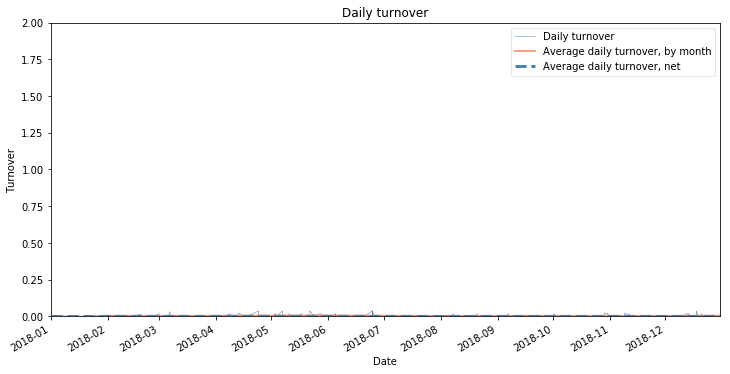

In [49]:
# Plot turnover.
pf.plot_turnover(returns, transactions, positions)
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/daily_turnover.png")
plt.show()

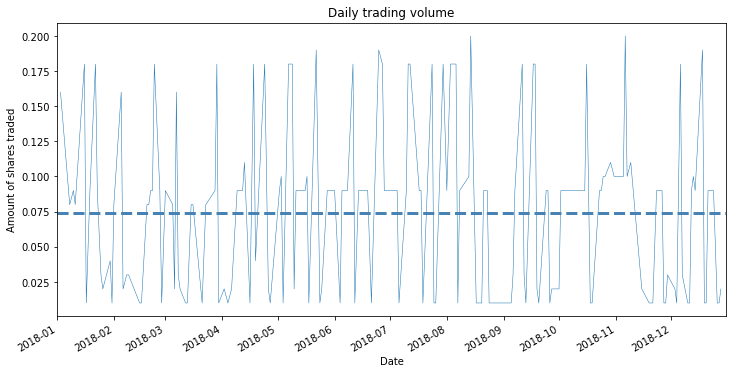

In [50]:
# Plot daily volume.
pf.plot_daily_volume(returns, transactions)
plt.xlabel("Date")
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/daily_trading_volume.png")
plt.show()

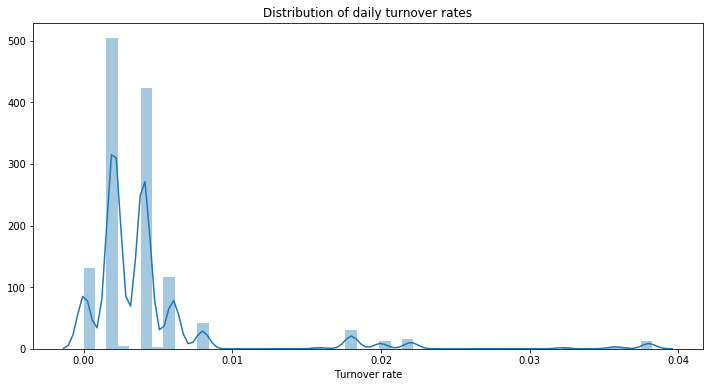

In [51]:
# Plot daily turnover hist.
pf.plot_daily_turnover_hist(transactions, positions)
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/distribution_daily_turnover_rates.png")
plt.show()

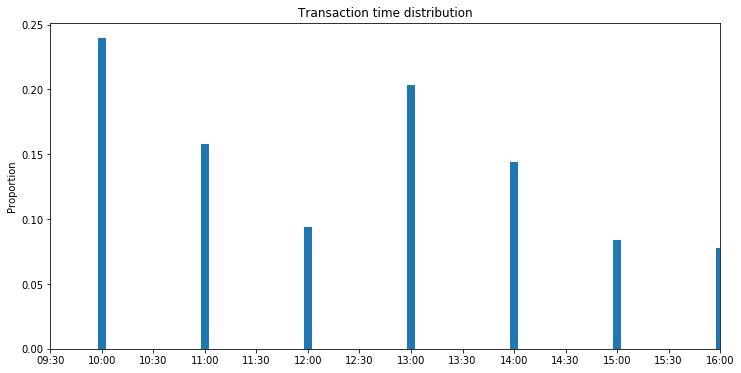

In [52]:
# Plot txn time hist.
pf.plot_txn_time_hist(transactions)
plt.gcf().set_size_inches(12, 6)
plt.savefig("./figures/txn_time_hist.png")
plt.show()

# 2.7 Bayesian performance.

In [53]:
# Run model that assumes returns to be T-distributed.
#trace = pf.bayesian.run_model('t', returns)

In [54]:
#print('Probability of Sharpe ratio > 0 = {:3}%'.format((trace['sharpe'] > 0).mean() * 100))

In [55]:
#import pymc3 as pm
#pm.traceplot(trace);

# 2.8 Round Trip Analysis.

In [56]:
# Set sector map. (REPORT BUG)

# Link: https://quantopian.github.io/pyfolio/notebooks/round_trip_tear_sheet_example/

#sect_map = {expert: 'Asset 1'}
#pf.create_round_trip_tear_sheet(returns, positions, transactions, sector_mappings=sect_map)

In [57]:
#rts = pf.round_trips.extract_round_trips(transactions, portfolio_value=positions.sum(axis='columns') / (returns + 1))
#pf.round_trips.print_round_trip_stats(rts)

# 2.9 Slippage Analysis.

# 3. Strategy Report generator.

In [58]:
# Generate template vars.
template_vars = {}
template_vars["title"] = "Strategy Report " + expert.replace("_", " ").capitalize()

In [59]:
# Add performance stats.

# General trading information.
template_vars["initial_balance"] = initial_balance
template_vars["final_balance"] = final_balance
template_vars["total_net_profit"] = round(total_net_profit, 2)
template_vars["profitability"] = profitability
template_vars["gross_profit"] = gross_profit
template_vars["gross_loss"] = gross_loss
template_vars["total_commission"] = total_commission
template_vars["total_swap"] = total_swap
template_vars["profit_factor"] = round(profit_factor, 2)

# Trades stats.
template_vars["max_profit_trade"] = max_profit_trade
template_vars["min_profit_trade"] = min_profit_trade
template_vars["max_loss_trade"] = max_loss_trade
template_vars["min_loss_trade"] = min_loss_trade
template_vars["total_deals"] = total_deals
template_vars["total_trades"] = total_trades
template_vars["expected_payoff"] = expected_payoff
template_vars["recovery_factor"] = recovery_factor
template_vars["average_profit"] = average_profit
template_vars["average_loss"] = average_loss 

template_vars["short_trades"] = short_trades
template_vars["buy_trades"] = buy_trades

template_vars["profit_vol"] = profit_vol #f
template_vars["loss_vol"] = loss_vol     #f

template_vars["short_profit_trades_abs"] = short_profit_trades_abs # n
template_vars["short_profit_trades_rel"] = short_profit_trades_rel # n
template_vars["buy_profit_trades_abs"] = buy_profit_trades_abs # n
template_vars["buy_profit_trades_rel"] = buy_profit_trades_rel # n
template_vars["total_profit_trades_abs"] = total_profit_trades_abs
template_vars["total_profit_trades_rel"] = total_profit_trades_rel
template_vars["total_loss_trades_abs"] = total_loss_trades_abs
template_vars["total_loss_trades_rel"] = total_loss_trades_rel

template_vars["ratio_wl"] = ratio_wl #f
template_vars["put_call_ratio"] = put_call_ratio #f

# Trading dates info.
template_vars["holding_max_time"] = holding_max_time
template_vars["holding_min_time"] = holding_min_time
template_vars["holding_average_time"] = holding_average_time

# Montecarlo info. F
template_vars["positive_outcomes_abs"] = positive_outcomes_abs
template_vars["negative_outcomes_abs"] = negative_outcomes_abs 
template_vars["positive_outcomes_rel"] = positive_outcomes_rel
template_vars["negative_outcomes_rel"] = negative_outcomes_rel
template_vars["montecarlo_initial_balance"] = last_balance
template_vars["montecarlo_days_simulated"] = montecarlo_days_simulated 
template_vars["montecarlo_mean_balance"] = montecarlo_mean_balance
template_vars["montecarlo_mean_netprofit"] = montecarlo_mean_netprofit
template_vars["montecarlo_profiability"] = montecarlo_profiability

In [60]:
# Add images to template vars.
from os import listdir
from os.path import isfile, join
mypath = "./figures"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for src in onlyfiles:
    key = src.replace(".png", "_img")
    template_vars[key] = "../" + mypath + "/" + src

In [61]:
template_vars

{'annual_returns_img': '.././figures/annual_returns.png',
 'asset_price_img': '.././figures/asset_price.png',
 'average_loss': -8.15,
 'average_profit': 22.983,
 'balance_img': '.././figures/balance.png',
 'buy_profit_trades_abs': 41,
 'buy_profit_trades_rel': 0.353,
 'buy_trades': 116,
 'cash_img': '.././figures/cash.png',
 'cumulative_returns_benchmark_img': '.././figures/cumulative_returns_benchmark.png',
 'cumulative_returns_img': '.././figures/cumulative_returns.png',
 'cumulative_returns_log_scale_img': '.././figures/cumulative_returns_log_scale.png',
 'daily_trading_volume_img': '.././figures/daily_trading_volume.png',
 'daily_turnover_img': '.././figures/daily_turnover.png',
 'distribution_daily_turnover_rates_img': '.././figures/distribution_daily_turnover_rates.png',
 'distribution_monthly_returns_img': '.././figures/distribution_monthly_returns.png',
 'entries_month_img': '.././figures/entries_month.png',
 'entries_week_days_img': '.././figures/entries_week_days.png',
 'entr

In [62]:
# Generate HTML strategy report.
from jinja2 import Environment, FileSystemLoader
env = Environment(loader = FileSystemLoader("."))
template = env.get_template("./strategy_report_template.html")

html_out = template.render(template_vars)
html_out

Html_file = open("./reports/" + expert + "_report.html", "w")
Html_file.write(html_out)
Html_file.close()

In [63]:
# Import pdfkit.
import pdfkit
config = pdfkit.configuration(wkhtmltopdf = bytes("C:/Users/Juan Esteban/Desktop/wkhtmltopdf/bin/wkhtmltopdf.exe", "utf-8"))

In [64]:
# Set files path.
html_path = "./reports/" + expert + "_report.html"
pdf_path = "./reports/" + expert + "_report.pdf"

In [65]:
# Generate PDF report.
pdfkit.from_file(html_path, pdf_path, configuration = config)

Loading pages (1/6)
QWin32PrintEngine::initialize: OpenPrinter failed (No printers were found.)
QWin32PrintEngine::initialize: OpenPrinter failed (No printers were found.)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                        


True

# 4. Send email.

In [104]:
# Import libraries.
import smtplib, ssl
import email

In [110]:
# Set email variables.
port = 465
password = """TR{-2C"6:UxB&Jef"""
sender_email = "tradinginformant@gmail.com"

receiver_email = "junes9710@gmail.com"
#receiver_email = "josealilopez1970@gmail.com"
#receiver_list = ["sebastianzapataveira@hotmail.com", "junes9710@gmail.com", "miamorenovi@unal.edu.co"]
#receiver_list = ["lrodriguez22000@gmail.com", "junes9710@gmail.com", "juandgomezri@gmail.com"]

In [111]:
# Generate message.
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from email.mime.base import MIMEBase
from email import encoders

msg = MIMEMultipart()
msg["From"] = sender_email
msg["To"] = receiver_email
msg["Subject"] = expert.replace("_", " ").capitalize() + " Report"

text = MIMEText("Report generated by Python.")
msg.attach(text)

pdf_report = open(pdf_path, "rb").read()
attached_pdf = MIMEApplication(pdf_report, _subtype = "pdf", _encoder = encoders.encode_base64)
attached_pdf.add_header("content-disposition", "attachment", filename = expert.capitalize() + " Report")
msg.attach(attached_pdf)

In [112]:
send_all = (input("Remitir el reporte a todos los correos? y/n  ==> ") == "y")

Remitir el reporte a todos los correos? y/n  ==> n


In [113]:
if send_all:
    receivers = receiver_list
else:
    receivers = receiver_email

In [114]:
# Set context.
context = ssl.create_default_context()
 
# Send email.
with smtplib.SMTP_SSL("smtp.gmail.com", port, context = context) as server:
    try:
        server.login(sender_email, password)
        server.sendmail(sender_email, receivers, msg.as_string())
        print("Email sent to ", receivers)
        server.quit()
    except:
        print("Unknown Error")

Email sent to  josealilopez1970@gmail.com
